# Detecting pictures of Cats and Dogs using CNN.

# Author - Rohan Kulkarni 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [2]:
#pip install cv2

In [3]:
#! pip install opencv-python

In [2]:
import cv2
import os

In [3]:
path1=r'E:\Imarticus\15.NEURAL NETWORK\images' ## Folder path
cate=['cats','dogs']                           ## For sub-folders

In [4]:
for i in cate:
    folders=os.path.join(path1,i)
    print(folders)

E:\Imarticus\15.NEURAL NETWORK\images\cats
E:\Imarticus\15.NEURAL NETWORK\images\dogs


In [5]:
for i in cate:
        folders=os.path.join(path1,i)
        for image in os.listdir(folders):
            image_path=os.path.join(folders,image)
            print(image_path)

E:\Imarticus\15.NEURAL NETWORK\images\cats\05836996c7f72c287ad227a937b03dc7.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\1006d45476f3c78fc2dd760f0e7765be.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\228fed796fe9f577a25e276fcf5b6d11.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\2c442b65f38856871b9069b3f1f7c3f1.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\59ecf6b1014140e645931a27ee9e0869.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\61b80cbded1c9adf895b20ba2ffd0867.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\63788fb7229b9fcb749268871c8fe9d6.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\783147b9f6acd843655c7be937dff86f.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\816fc4ae689dbad24acafcf89de23ab2.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\929d3d9f76f406b5ac6020323d2d32dc.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\a9b699aedf9e9ddde9bc8e738dd33ef5.jpg
E:\Imarticus\15.NEURAL NETWORK\images\cats\b1663921e077c32db2e294a9a026a417.jpg
E:\Imarticus\15.NEURAL NETWORK\images\ca

### Images are able to access

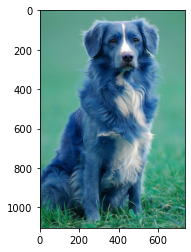

In [6]:
 for i in cate:
        folders=os.path.join(path1,i)
        for image in os.listdir(folders):
            image_path=os.path.join(folders,image)
            image_array= cv2.imread(image_path)    # using cv2 we are reading image 1
            plt.imshow(image_array)
            break
            
# Code for explanation purpose

In [7]:
abcd=cv2.imread(r'E:\Imarticus\15.NEURAL NETWORK\images\cats\05836996c7f72c287ad227a937b03dc7.jpg')

In [8]:
abcd.shape

(768, 590, 3)

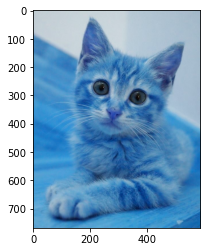

In [9]:
plt.imshow(abcd)

## Y variable is still missing, till this point we have X.

## Labeling images

In [10]:
image_size=200
input_image=[]
    
for i in cate:
    folders=os.path.join(path1,i)
    label  =cate.index(i)        # we need to tell software which image is of cat and dog
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array= cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size)) # Resizing the image
        input_image.append([image_array, label])

In [11]:
input_image[1] # labelled cat as 0

[array([[[ 41,  73, 108],
         [ 41,  73, 108],
         [ 40,  72, 107],
         ...,
         [117, 167, 185],
         [117, 167, 185],
         [116, 166, 184]],
 
        [[ 41,  73, 108],
         [ 41,  73, 108],
         [ 44,  76, 111],
         ...,
         [117, 167, 185],
         [117, 167, 185],
         [116, 166, 184]],
 
        [[ 44,  76, 111],
         [ 44,  76, 111],
         [ 44,  76, 111],
         ...,
         [117, 167, 185],
         [117, 167, 185],
         [117, 167, 185]],
 
        ...,
 
        [[228, 233, 232],
         [229, 234, 233],
         [229, 234, 233],
         ...,
         [220, 223, 227],
         [220, 223, 227],
         [220, 223, 227]],
 
        [[224, 228, 229],
         [224, 228, 230],
         [220, 223, 226],
         ...,
         [220, 223, 227],
         [220, 223, 227],
         [220, 223, 227]],
 
        [[220, 223, 227],
         [220, 223, 227],
         [216, 219, 223],
         ...,
         [220, 223, 227],
  

In [12]:
input_image[19] # Labelled Dog as 1

[array([[[ 99, 172, 180],
         [ 99, 172, 180],
         [ 99, 172, 180],
         ...,
         [224, 206, 183],
         [225, 207, 184],
         [225, 207, 184]],
 
        [[101, 174, 182],
         [102, 175, 183],
         [102, 175, 183],
         ...,
         [224, 206, 183],
         [225, 207, 184],
         [224, 206, 183]],
 
        [[103, 176, 184],
         [104, 177, 185],
         [103, 176, 184],
         ...,
         [225, 207, 184],
         [225, 207, 184],
         [224, 206, 183]],
 
        ...,
 
        [[ 98, 145, 144],
         [115, 150, 152],
         [142, 166, 175],
         ...,
         [110, 168, 163],
         [109, 167, 162],
         [110, 168, 163]],
 
        [[112, 150, 154],
         [146, 174, 185],
         [144, 168, 184],
         ...,
         [110, 167, 164],
         [110, 167, 164],
         [110, 167, 164]],
 
        [[151, 173, 182],
         [140, 163, 178],
         [127, 155, 173],
         ...,
         [110, 167, 164],
  

In [13]:
np.random.shuffle(input_image)

X=[]
y=[]

for X_values,labels in input_image:
    X.append(X_values)
    y.append(labels)

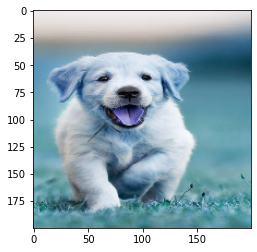

In [14]:
plt.imshow(X[0]) # images will shuffle every time we run shuffle cell

In [15]:
X=np.array(X)
y=np.array(y)

X=X/255

model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X,y ,epochs=10)

Epoch 1/10
2/2 [==============================] - 4s 280ms/step - loss: 0.6630 - accuracy: 0.5588
Epoch 2/10
2/2 [==============================] - 2s 203ms/step - loss: 12.5646 - accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 2s 199ms/step - loss: 3.1030 - accuracy: 0.4412
Epoch 4/10
2/2 [==============================] - 2s 198ms/step - loss: 2.9969 - accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 2s 191ms/step - loss: 2.9162 - accuracy: 0.5882
Epoch 6/10
2/2 [==============================] - 2s 197ms/step - loss: 1.0685 - accuracy: 0.6765
Epoch 7/10
2/2 [==============================] - 2s 191ms/step - loss: 0.4957 - accuracy: 0.7941
Epoch 8/10
2/2 [==============================] - 2s 206ms/step - loss: 0.5214 - accuracy: 0.7353
Epoch 9/10
2/2 [==============================] - 2s 182ms/step - loss: 0.3662 - accuracy: 0.8529
Epoch 10/10
2/2 [==============================] - 2s 186ms/step - loss: 0.3174 - accuracy: 0.8529


In [17]:
pred=model.predict(X)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
pred_argmax=np.argmax(pred,axis=1)

In [22]:
confusion_matrix(pred_argmax,y)

array([[17,  0],
       [ 0, 17]], dtype=int64)

In [21]:
accuracy_score(y,pred_argmax)

1.0

In [23]:
pwd

'C:\\Users\\_RoXstaR_'

## To save Model in present working directory PWD

In [24]:
model.save('my_cat_dog_model.h5')   

In [25]:
pwd

'C:\\Users\\_RoXstaR_'

### If we want to run a model after a month for prediction we have to load that model

In [26]:
from keras.models import load_model

In [27]:
model=load_model('my_cat_dog_model.h5') # To load the model

### now use it for prediction

In [31]:
pred1=model.predict(X)

In [32]:
pred_argmax1=np.argmax(pred1,axis=1)

In [33]:
pred_argmax1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)